In [1]:
import pyspark
import pandas as pd
import numpy as np
import math
import time

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
bhvr = pd.read_csv('QVI_purchase_behaviour.csv')
trsn = pd.read_excel("QVI_transaction_data.xlsx")

In [3]:
bhvr

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
np_df = pd.DataFrame(np.random.randn(10,6))
# Make a few areas have NaN values
np_df.iloc[1:3,1] = np.nan
np_df.iloc[5,3] = np.nan
np_df.iloc[7:9,5] = np.nan
np_df

,0,1,2,3,4,5
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653


# df.loc
Primarily labelled based

In [5]:
bhvr.loc[[0, 5, 7]]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
5,1007,YOUNG SINGLES/COUPLES,Budget
7,1010,YOUNG SINGLES/COUPLES,Mainstream


In [6]:
bhvr.loc[5, 'LIFESTAGE']

'YOUNG SINGLES/COUPLES'

In [7]:
bhvr.loc[[0, 5, 7], ['LYLTY_CARD_NBR']] += 0.01
bhvr.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000.01,YOUNG SINGLES/COUPLES,Premium
1,1002.00,YOUNG SINGLES/COUPLES,Mainstream
2,1003.00,YOUNG FAMILIES,Budget
3,1004.00,OLDER SINGLES/COUPLES,Mainstream
4,1005.00,MIDAGE SINGLES/COUPLES,Mainstream
5,1007.01,YOUNG SINGLES/COUPLES,Budget
6,1009.00,NEW FAMILIES,Premium
7,1010.01,YOUNG SINGLES/COUPLES,Mainstream
8,1011.00,OLDER SINGLES/COUPLES,Mainstream
9,1012.00,OLDER FAMILIES,Mainstream


# df.iloc
Primarily integer based

In [8]:
bhvr.iloc[0:5]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000.01,YOUNG SINGLES/COUPLES,Premium
1,1002.00,YOUNG SINGLES/COUPLES,Mainstream
2,1003.00,YOUNG FAMILIES,Budget
3,1004.00,OLDER SINGLES/COUPLES,Mainstream
4,1005.00,MIDAGE SINGLES/COUPLES,Mainstream


In [9]:
bhvr.iloc[:, 2]

0           Premium
1        Mainstream
2            Budget
3        Mainstream
4        Mainstream
            ...    
72632    Mainstream
72633    Mainstream
72634       Premium
72635        Budget
72636    Mainstream
Name: PREMIUM_CUSTOMER, Length: 72637, dtype: object

# Null values

In [10]:
np_df

,0,1,2,3,4,5
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653


In [11]:
# Show how many null values in each column
np_df.isnull().sum()

0    0
1    2
2    0
3    1
4    0
5    2
dtype: int64

In [12]:
# Check which columns have Null values
np_df.isnull().any()

0    False
1     True
2    False
3     True
4    False
5     True
dtype: bool

In [13]:
# Check if there are any null values in the df
np_df.isnull().any().any()

True

In [14]:
np_df[np_df[1].isnull()]

,0,1,2,3,4,5
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638


In [15]:
np.where(np_df[5].isnull())

(array([7, 8], dtype=int64),)

In [16]:
list(np_df[np_df[5].isnull()].index)

[7, 8]

In [17]:
np_df.dropna(how='any')
# if want to specify the number of null values to drop a row, use
# df.dropna(thresh=3)

# make sure to assign a new df whenever removing from df

,0,1,2,3,4,5
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653


# Removing rows

In [18]:
np_df

,0,1,2,3,4,5
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653


In [43]:
np_df.drop(5)

,1,2,3,4,5,6,7,8
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326,0,1
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586,0,2
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638,0,3
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966,0,4
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281,0,5
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245,0,7
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN,0,8
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN,0,9
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653,0,10


# Adding rows

In [20]:
new = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}
np_df.append(new, ignore_index=True)

,0,1,2,3,4,5,6
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326,NaN
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586,NaN
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638,NaN
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966,NaN
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281,NaN
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561,NaN
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245,NaN
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN,NaN
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN,NaN
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653,NaN


# Adding columns

In [21]:
np_df['New'] = 0
np_df

,0,1,2,3,4,5,New
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326,0
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586,0
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638,0
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966,0
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281,0
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561,0
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245,0
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN,0
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN,0
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653,0


In [24]:
np_df

,0,1,2,3,4,5,New
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326,0
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586,0
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638,0
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966,0
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281,0
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561,0
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245,0
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN,0
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN,0
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653,0


In [27]:
new_col = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
np_df['New2'] = new_col
np_df

,0,1,2,3,4,5,New,New2
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326,0,1
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586,0,2
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638,0,3
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966,0,4
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281,0,5
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561,0,6
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245,0,7
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN,0,8
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN,0,9
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653,0,10


# Removing columns

In [28]:
np_df.drop(columns=['New', 1])

,0,2,3,4,5,New2
0,0.849633,-0.610513,-0.771799,-1.397522,-0.869326,1
1,0.605645,0.755902,-0.773677,0.287604,0.533586,2
2,0.460842,-0.859491,0.866052,0.049127,-0.567638,3
3,-0.451245,1.139859,-0.241466,-1.338907,-0.987966,4
4,-1.279614,-0.477187,1.286797,1.356184,1.129281,5
5,-1.162971,-1.208420,NaN,1.421809,1.439561,6
6,2.110525,-1.212546,1.432580,1.057637,0.868245,7
7,0.770743,-0.516945,0.226085,0.932013,NaN,8
8,0.072126,-0.758657,-1.031151,0.771196,NaN,9
9,0.221092,0.136434,1.727191,-1.615735,0.897653,10


# Renaming columns

In [30]:
np_df.rename(columns={'New': 7})

,0,1,2,3,4,5,7,New2
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326,0,1
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586,0,2
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638,0,3
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966,0,4
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281,0,5
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561,0,6
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245,0,7
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN,0,8
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN,0,9
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653,0,10


In [32]:
renamed = [1, 2, 3, 4, 5, 6, 7, 8]
np_df.columns = renamed
np_df

,1,2,3,4,5,6,7,8
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326,0,1
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586,0,2
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638,0,3
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966,0,4
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281,0,5
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561,0,6
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245,0,7
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN,0,8
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN,0,9
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653,0,10


# Reset Index
Always reset index especially after removing, adding, or sorting the df

In [49]:
np_df.sort_values(by=1)

,1,2,3,4,5,6,7,8
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281,0,5
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561,0,6
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966,0,4
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN,0,9
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653,0,10
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638,0,3
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586,0,2
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN,0,8
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326,0,1
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245,0,7


In [50]:
np_df.reset_index(drop=True)

,1,2,3,4,5,6,7,8
0,0.849633,-0.360152,-0.610513,-0.771799,-1.397522,-0.869326,0,1
1,0.605645,NaN,0.755902,-0.773677,0.287604,0.533586,0,2
2,0.460842,NaN,-0.859491,0.866052,0.049127,-0.567638,0,3
3,-0.451245,-3.103829,1.139859,-0.241466,-1.338907,-0.987966,0,4
4,-1.279614,0.382923,-0.477187,1.286797,1.356184,1.129281,0,5
5,-1.162971,-1.035577,-1.208420,NaN,1.421809,1.439561,0,6
6,2.110525,1.032502,-1.212546,1.432580,1.057637,0.868245,0,7
7,0.770743,0.725079,-0.516945,0.226085,0.932013,NaN,0,8
8,0.072126,1.714250,-0.758657,-1.031151,0.771196,NaN,0,9
9,0.221092,0.970714,0.136434,1.727191,-1.615735,0.897653,0,10


# Groupby

In [34]:
trsn.groupby(['PROD_NAME']).mean()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
PROD_NAME,,,,,,,
Burger Rings 220g,43466.154731,135.143862,136776.009591,135332.189258,94.0,1.898977,4.367647
CCs Nacho Cheese 175g,43463.786382,131.395194,131542.912550,131307.772363,66.0,1.895194,3.979907
CCs Original 175g,43463.387054,136.112946,136305.650594,136300.706077,54.0,1.902246,3.994716
CCs Tasty Cheese 175g,43466.944120,136.567251,136764.177388,136685.936322,91.0,1.877843,3.943470
Cheetos Chs & Bacon Balls 190g,43457.564571,131.318458,131461.524003,131155.517918,18.0,1.893847,6.249696
...,...,...,...,...,...,...,...
WW Sour Cream &OnionStacked Chips 160g,43461.222522,136.637896,136789.944707,136655.260283,21.0,1.889413,3.589885
WW Supreme Cheese Corn Chips 200g,43466.986083,136.786614,136933.864811,136848.692512,27.0,1.880053,3.572101
Woolworths Cheese Rings 190g,43466.364776,134.209103,134356.603562,134167.830475,105.0,1.894459,3.410026


In [54]:
trsn.groupby(['PROD_NAME']).sum()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
PROD_NAME,,,,,,,
Burger Rings 220g,67981066,211365,213917679,211659544,147016,2970,6831.0
CCs Nacho Cheese 175g,65108752,196830,197051283,196699043,98868,2839,5961.9
CCs Original 175g,65803568,206075,206366755,206359269,81756,2880,6048.0
CCs Tasty Cheese 175g,66895627,210177,210480069,210359656,140049,2890,6069.0
Cheetos Chs & Bacon Balls 190g,64273738,194220,194431594,193979011,26622,2801,9243.3
...,...,...,...,...,...,...,...
WW Sour Cream &OnionStacked Chips 160g,64452993,202634,202859488,202659751,31143,2802,5323.8
WW Supreme Cheese Corn Chips 200g,65591682,206411,206633202,206504677,40743,2837,5390.3
Woolworths Cheese Rings 190g,65895009,203461,203684611,203398431,159180,2872,5169.6


In [36]:
trsn.groupby(['PROD_NAME']).count()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
PROD_NAME,,,,,,,
Burger Rings 220g,1564,1564,1564,1564,1564,1564,1564
CCs Nacho Cheese 175g,1498,1498,1498,1498,1498,1498,1498
CCs Original 175g,1514,1514,1514,1514,1514,1514,1514
CCs Tasty Cheese 175g,1539,1539,1539,1539,1539,1539,1539
Cheetos Chs & Bacon Balls 190g,1479,1479,1479,1479,1479,1479,1479
...,...,...,...,...,...,...,...
WW Sour Cream &OnionStacked Chips 160g,1483,1483,1483,1483,1483,1483,1483
WW Supreme Cheese Corn Chips 200g,1509,1509,1509,1509,1509,1509,1509
Woolworths Cheese Rings 190g,1516,1516,1516,1516,1516,1516,1516


# Plots

In [37]:
cust_type = bhvr.groupby('PREMIUM_CUSTOMER').count().drop(columns='LYLTY_CARD_NBR')
cust_type

,LIFESTAGE
PREMIUM_CUSTOMER,
Budget,24470
Mainstream,29245
Premium,18922


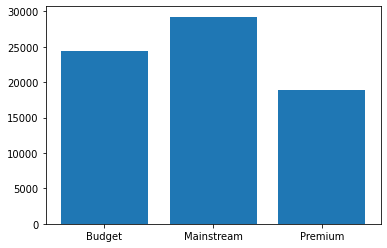

In [38]:
plt.bar(cust_type.index, cust_type['LIFESTAGE'])
plt.show()

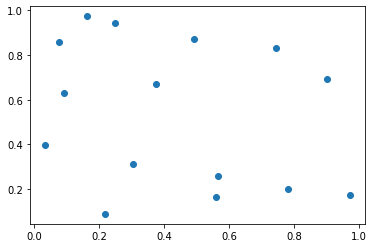

In [39]:
x = np.random.rand(15)
y = np.random.rand(15)
plt.scatter(x, y)
plt.show()

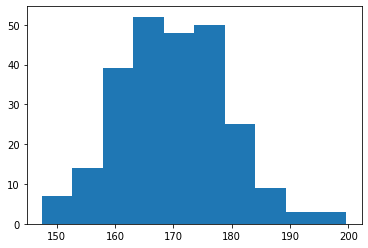

In [40]:
x = np.random.normal(170, 10, 250)

plt.hist(x)
plt.show()